<a id='top'></a>

# Data Aggregation of StatsBomb Event data
##### Notebook to aggregated engineered [StatsBomb](https://statsbomb.com/)  Event data on a match-by-match basis


### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 31/12/2020<br>
Notebook last updated: 31/12/2020

![title](../../img/stats-bomb-logo.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook aggregated previously engineered Event data from [StatsBomb](https://statsbomb.com/) on a match-by-match basis, manipulated as DataFrames using [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) for visualisation.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [49]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Flatten lists
from functools import reduce

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [50]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [51]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [52]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_sb = os.path.join(base_dir, 'data', 'sb')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [53]:
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook engineered data scraped from [StatsBomb](https://statsbomb.com/)  and FBref using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

The data of player values produced in this notebook is exported to CSV and used to create Age Profile visualisation in Tableau. See example [here](https://twitter.com/NdyStats/status/1343809317107986438).

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>
Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. Data Dictionaries</a>
The [StatsBomb](https://statsbomb.com/)  dataset has six features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `position_number`    | object     |
| `position_description`    | object     |
| `name`    | object     |
| `dob`    | object     |
| `nationality`    | object     |
| `value`    | object     |

### <a id='#section3.3'>3.3. Import CSV as pandas DataFrame</a>

In [54]:
# Show files in directory
print(glob.glob(data_dir_sb + '/events/engineered/*.csv'))

['../../data/sb/events/engineered/sb_events_passing_network_1819_2021_wsl.csv', '../../data/sb/events/engineered/events_reading_stoke_07112020.csv', '../../data/sb/events/engineered/sb_events_1819_2021_wsl.csv']


In [55]:
# Import DataFrame as a CSV file
df_sb = pd.read_csv(data_dir_sb + '/events/engineered/sb_events_1819_2021_wsl.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
#df_sb = pd.read_csv(data_dir + '/export/sb_wsl_events.csv')

### <a id='#section3.4'>3.4. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [56]:
# Display the first 5 rows of the raw DataFrame, df_sb
df_sb.head()

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,carry.end_location,under_pressure,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,dribble.outcome.id,dribble.outcome.name,pass.assisted_shot_id,pass.shot_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,off_camera,duel.outcome.id,duel.outcome.name,pass.switch,ball_recovery.recovery_failure,50_50.outcome.id,50_50.outcome.name,foul_committed.card.id,foul_committed.card.name,shot.one_on_one,shot.aerial_won,pass.through_ball,pass.technique.id,pass.technique.name,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_won.defensive,clearance.aerial_won,pass.backheel,pass.cross,foul_committed.offensive,foul_committed.advantage,foul_won.advantage,dribble.overrun,foul_committed.penalty,foul_won.penalty,injury_stoppage.in_chain,miscontrol.aerial_won,block.offensive,match_id,shot.open_goal,shot.first_time,dribble.nutmeg,pass.cut_back,pass.deflected,pass.goal_assist,foul_committed.type.id,foul_committed.type.name,pass.miscommunication,ball_recovery.offensive,block.save_block,block.deflection,clearance.head,clearance.body_part.id,clearance.body_part.name,out,clearance.left_foot,clearance.right_foot,pass.inswinging,pass.straight,clearance.other,pass.outswinging,shot.redirect,shot.deflected,bad_behaviour.card.id,bad_behaviour.card.name,pass.no_touch,dribble.no_touch,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.lost_out,goalkeeper.punched_out,player_off.permanent,shot.saved_to_post,goalkeeper.shot_saved_to_post,goalkeeper.lost_in_play,goalkeeper.success_out,shot.follows_dribble,half_start.late_video_start,goalkeeper.success_in_play,half_end.early_video_end,goalkeeper.saved_to_post,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_id,season_id,country_name,competition_name,competition_gender,season_name,Team,Opponent,Full_Fixture_Date,location_x,location_y,pass.end_location_x,pass.end_location_y,carry.end_location_x,carry.end_location_y,shot.end_location_x,shot.end_location_y,shot.end_location_z,goalkeeper.end_location_x,goalkeeper.end_location_y
0,ac80414e-cec3-4c56-8e57-ac04149efbe2,5,1,00:00:01.324,0,1,2,1.228695,30,Pass,971,Chelsea FCW,9,From Kick Off,971,Chelsea FCW,NaN,NaN,['89cf3d24-ba04-4269-9071-1dfabf468cd1'],"61.0, 41.0",4641.0,

In [57]:
# Display the last 5 rows of the raw DataFrame, df_sb
df_sb.tail()

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,carry.end_location,under_pressure,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,dribble.outcome.id,dribble.outcome.name,pass.assisted_shot_id,pass.shot_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,off_camera,duel.outcome.id,duel.outcome.name,pass.switch,ball_recovery.recovery_failure,50_50.outcome.id,50_50.outcome.name,foul_committed.card.id,foul_committed.card.name,shot.one_on_one,shot.aerial_won,pass.through_ball,pass.technique.id,pass.technique.name,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_won.defensive,clearance.aerial_won,pass.backheel,pass.cross,foul_committed.offensive,foul_committed.advantage,foul_won.advantage,dribble.overrun,foul_committed.penalty,foul_won.penalty,injury_stoppage.in_chain,miscontrol.aerial_won,block.offensive,match_id,shot.open_goal,shot.first_time,dribble.nutmeg,pass.cut_back,pass.deflected,pass.goal_assist,foul_committed.type.id,foul_committed.type.name,pass.miscommunication,ball_recovery.offensive,block.save_block,block.deflection,clearance.head,clearance.body_part.id,clearance.body_part.name,out,clearance.left_foot,clearance.right_foot,pass.inswinging,pass.straight,clearance.other,pass.outswinging,shot.redirect,shot.deflected,bad_behaviour.card.id,bad_behaviour.card.name,pass.no_touch,dribble.no_touch,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.lost_out,goalkeeper.punched_out,player_off.permanent,shot.saved_to_post,goalkeeper.shot_saved_to_post,goalkeeper.lost_in_play,goalkeeper.success_out,shot.follows_dribble,half_start.late_video_start,goalkeeper.success_in_play,half_end.early_video_end,goalkeeper.saved_to_post,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_id,season_id,country_name,competition_name,competition_gender,season_name,Team,Opponent,Full_Fixture_Date,location_x,location_y,pass.end_location_x,pass.end_location_y,carry.end_location_x,carry.end_location_y,shot.end_location_x,shot.end_location_y,shot.end_location_z,goalkeeper.end_location_x,goalkeeper.end_location_y
647276,36d07e5c-8608-4d1f-b090-4172c9f9bc01,3749,2,00:47:57.409,92,57,193,3.310232,43,Carry,971,Chelsea FCW,1,Regular Play,971,Chelsea FCW,NaN,NaN,"['2f7add5d-4ce1-4504-a232-082ae203c738', 'c988..

In [58]:
# Print the shape of the raw DataFrame, df_sb
print(df_sb.shape)

(647281, 207)


In [59]:
# Print the column names of the raw DataFrame, df_sb
print(df_sb.columns)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type.id', 'type.name',
       ...
       'location_y', 'pass.end_location_x', 'pass.end_location_y',
       'carry.end_location_x', 'carry.end_location_y', 'shot.end_location_x',
       'shot.end_location_y', 'shot.end_location_z',
       'goalkeeper.end_location_x', 'goalkeeper.end_location_y'],
      dtype='object', length=207)


The dataset has thirteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [60]:
# Data types of the features of the raw DataFrame, df_sb
df_sb.dtypes

id                           object
index                        object
period                       object
timestamp                    object
minute                       object
                              ...  
shot.end_location_x          object
shot.end_location_y          object
shot.end_location_z          object
goalkeeper.end_location_x    object
goalkeeper.end_location_y    object
Length: 207, dtype: object

All thirteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [61]:
# Info for the raw DataFrame, df_sb
df_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647281 entries, 0 to 647280
Columns: 207 entries, id to goalkeeper.end_location_y
dtypes: object(207)
memory usage: 1022.2+ MB


In [62]:
# Description of the raw DataFrame, df_sb, showing some summary statistics for each numberical column in the DataFrame
df_sb.describe()

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,carry.end_location,under_pressure,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,dribble.outcome.id,dribble.outcome.name,pass.assisted_shot_id,pass.shot_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,off_camera,duel.outcome.id,duel.outcome.name,pass.switch,ball_recovery.recovery_failure,50_50.outcome.id,50_50.outcome.name,foul_committed.card.id,foul_committed.card.name,shot.one_on_one,shot.aerial_won,pass.through_ball,pass.technique.id,pass.technique.name,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_won.defensive,clearance.aerial_won,pass.backheel,pass.cross,foul_committed.offensive,foul_committed.advantage,foul_won.advantage,dribble.overrun,foul_committed.penalty,foul_won.penalty,injury_stoppage.in_chain,miscontrol.aerial_won,block.offensive,match_id,shot.open_goal,shot.first_time,dribble.nutmeg,pass.cut_back,pass.deflected,pass.goal_assist,foul_committed.type.id,foul_committed.type.name,pass.miscommunication,ball_recovery.offensive,block.save_block,block.deflection,clearance.head,clearance.body_part.id,clearance.body_part.name,out,clearance.left_foot,clearance.right_foot,pass.inswinging,pass.straight,clearance.other,pass.outswinging,shot.redirect,shot.deflected,bad_behaviour.card.id,bad_behaviour.card.name,pass.no_touch,dribble.no_touch,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.lost_out,goalkeeper.punched_out,player_off.permanent,shot.saved_to_post,goalkeeper.shot_saved_to_post,goalkeeper.lost_in_play,goalkeeper.success_out,shot.follows_dribble,half_start.late_video_start,goalkeeper.success_in_play,half_end.early_video_end,goalkeeper.saved_to_post,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_id,season_id,country_name,competition_name,competition_gender,season_name,Team,Opponent,Full_Fixture_Date,location_x,location_y,pass.end_location_x,pass.end_location_y,carry.end_location_x,carry.end_location_y,shot.end_location_x,shot.end_location_y,shot.end_location_z,goalkeeper.end_location_x,goalkeeper.end_location_y
count,647281,647281,647281,647281,647281,647281,647281,487510,647281,647281,647281,647281,647281,647281,647281,647281,345,345,616014,644074,645788,645788,645788,645788,159771,159771,176054,176054,

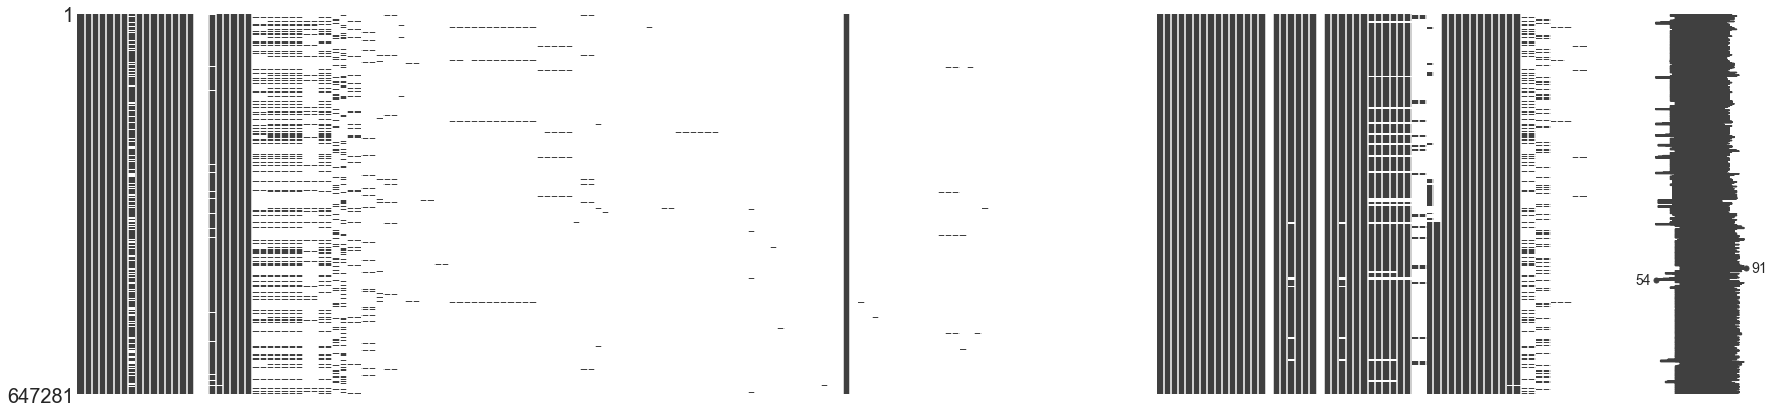

In [63]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_sb
msno.matrix(df_sb, figsize = (30, 7))

In [64]:
# Counts of missing values
sb_null_value_stats = df_sb.isnull().sum(axis=0)
sb_null_value_stats[sb_null_value_stats != 0]

duration                     159771
tactics.formation            646936
tactics.lineup               646936
related_events                31267
location                       3207
                              ...  
shot.end_location_x          642242
shot.end_location_y          642242
shot.end_location_z          643722
goalkeeper.end_location_x    644140
goalkeeper.end_location_y    644140
Length: 157, dtype: int64

The visualisation shows us very quickly that there a few missing values in most of the columns, but the dataset is ready for us.

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Assign DataFrames to Match-on_match DataFrame</a>

In [65]:
# Assign Raw DataFrames to new Engineered DataFrames
df_sb_mom = df_sb

### <a id='#section4.2'>4.2. Select Columns of Interest</a>

In [66]:
df_sb_mom.head()

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.type.id,pass.type.name,pass.body_part.id,pass.body_part.name,carry.end_location,under_pressure,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,dribble.outcome.id,dribble.outcome.name,pass.assisted_shot_id,pass.shot_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.technique.id,shot.technique.name,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,off_camera,duel.outcome.id,duel.outcome.name,pass.switch,ball_recovery.recovery_failure,50_50.outcome.id,50_50.outcome.name,foul_committed.card.id,foul_committed.card.name,shot.one_on_one,shot.aerial_won,pass.through_ball,pass.technique.id,pass.technique.name,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_won.defensive,clearance.aerial_won,pass.backheel,pass.cross,foul_committed.offensive,foul_committed.advantage,foul_won.advantage,dribble.overrun,foul_committed.penalty,foul_won.penalty,injury_stoppage.in_chain,miscontrol.aerial_won,block.offensive,match_id,shot.open_goal,shot.first_time,dribble.nutmeg,pass.cut_back,pass.deflected,pass.goal_assist,foul_committed.type.id,foul_committed.type.name,pass.miscommunication,ball_recovery.offensive,block.save_block,block.deflection,clearance.head,clearance.body_part.id,clearance.body_part.name,out,clearance.left_foot,clearance.right_foot,pass.inswinging,pass.straight,clearance.other,pass.outswinging,shot.redirect,shot.deflected,bad_behaviour.card.id,bad_behaviour.card.name,pass.no_touch,dribble.no_touch,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.lost_out,goalkeeper.punched_out,player_off.permanent,shot.saved_to_post,goalkeeper.shot_saved_to_post,goalkeeper.lost_in_play,goalkeeper.success_out,shot.follows_dribble,half_start.late_video_start,goalkeeper.success_in_play,half_end.early_video_end,goalkeeper.saved_to_post,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_id,season_id,country_name,competition_name,competition_gender,season_name,Team,Opponent,Full_Fixture_Date,location_x,location_y,pass.end_location_x,pass.end_location_y,carry.end_location_x,carry.end_location_y,shot.end_location_x,shot.end_location_y,shot.end_location_z,goalkeeper.end_location_x,goalkeeper.end_location_y
0,ac80414e-cec3-4c56-8e57-ac04149efbe2,5,1,00:00:01.324,0,1,2,1.228695,30,Pass,971,Chelsea FCW,9,From Kick Off,971,Chelsea FCW,NaN,NaN,['89cf3d24-ba04-4269-9071-1dfabf468cd1'],"61.0, 41.0",4641.0,

In [67]:
# Select columns of interest

## Define columns
cols = ['match_date',
        'kick_off',
        'season_name',
        'competition_name',
        'Full_Fixture_Date',
        'match_week',
        'home_team.home_team_name',
        'away_team.away_team_name',
        'team.name',
        'type.name',
       ]

##
df_sb_mom_select = df_sb_mom[cols]

##
df_sb_mom_select['opponent.name'] = np.where(df_sb_mom_select['away_team.away_team_name'] == df_sb_mom_select['team.name'], df_sb_mom_select['home_team.home_team_name'], df_sb_mom_select['away_team.away_team_name'])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [68]:
df_sb_mom_select

,match_date,kick_off,season_name,competition_name,Full_Fixture_Date,match_week,home_team.home_team_name,away_team.away_team_name,team.name,type.name,opponent.name
0,2018-10-21,13:30:00.000,2018/2019,FA Women's Super League,2018-10-21 Birmingham City WFC 0 vs. 0 Chels...,6,Birmingham City WFC,Chelsea FCW,Chelsea FCW,Pass,Birmingham City WFC
1,2018-10-21,13:30:00.000,2018/2019,FA Women's Super League,2018-10-21 Birmingham City WFC 0 vs. 0 Chels...,6,Birmingham City WFC,Chelsea FCW,Chelsea FCW,Ball Receipt*,Birmingham City WFC
2,2018-10-21,13:30:00.000,2018/2019,FA Women's Super League,2018-10-21 Birmingham City WFC 0 vs. 0 Chels...,6,Birmingham City WFC,Chelsea FCW,Chelsea FCW,Carry,Birmingham City WFC
3,2018-10-21,13:30:00.000,2018/2019,FA Women's Super League,2018-10-21 Birmingham City WFC 0 vs. 0 Chels...,6,Birmingham City WFC,Chelsea FCW,Chelsea FCW,Pass,Birmingham City WFC
4,2018-10-21,13:30:00.000,2018/2019,FA Women's Super League,2018-10-21 Birmingham City WFC 0 vs. 0 Chels...,6,Birmingham City WFC,Chelsea FCW,Chelsea FCW,Ball Receipt*,Birmingham City WFC
...,...,...,...,...,...,...,...,...,...,...,...
647276,2020-02-12,20:00:00.000,2019/2020,FA Women's Super League,2020-02-12 Chelsea FCW 2 vs. 0 Birmingham Ci...,16,Chelsea FCW,Birmingham City WFC,Chelsea FCW,Carry,Birmingham City WFC
647277,2020-02-12,20:00:00.000,2019/2020,FA Women's Super League,2020-02-12 Chelsea FCW 2 vs. 0 Birmingham Ci...,16,Chelsea FCW,Birmingham City WFC,Chelsea FCW,Pass,Birmingham City WFC
647278,2020-02-12,20:00:00.000,2019/2020,FA Women's Super League,2020-02-12 Chelsea FCW 2 vs. 0 Birmingham Ci...,16,Chelsea FCW,Birmingham City WFC,Chelsea FCW,Ball Receipt*,Birmingham City WFC
647279,2020-02-12,20:00:00.000,2019/2020,FA Women's Super League,2020-02-12 Chelsea FCW 2 vs. 0 Birmingham Ci...,16,Chelsea FCW,Birmingham City WFC,Chelsea FCW,Half End,Birmingham City WFC


In [69]:
#

##
df_sb_mom_grouped = (df_sb_mom_select
                         #.groupby(['full_fixture_date'])
                          .groupby(['match_date',
                                    'kick_off',
                                    'season_name',
                                    'competition_name',
                                    'Full_Fixture_Date',
                                    'match_week',
                                    'home_team.home_team_name',
                                    'away_team.away_team_name',
                                    'team.name',
                                    'opponent.name',
                                    'type.name'])
                          .agg({'type.name': ['count']})
                     )

##
df_sb_mom_grouped.columns = df_sb_mom_grouped.columns.droplevel(level=0)


##
df_sb_mom_grouped = df_sb_mom_grouped.reset_index()

##
df_sb_mom_grouped = df_sb_mom_grouped.rename(columns={'match_date': 'match_date',
                                                      'kick_off': 'kick_off',
                                                      'season_name': 'season_name',
                                                      'competition_name': 'competition_name',
                                                      'Full_Fixture_Date': 'full_fixture_date',
                                                      'match_week': 'match_week',
                                                      'home_team.home_team_name': 'home_team',
                                                      'away_team.away_team_name': 'away_team',
                                                      'team.name': 'team_name',
                                                      'opponent.name': 'opponent_name',
                                                      'type.name': 'event_name',
                                                      'count': 'team_value'
                                                     }
                                            )


##
df_sb_mom_grouped.head()

,match_date,kick_off,season_name,competition_name,full_fixture_date,match_week,home_team,away_team,team_name,opponent_name,event_name,team_value
0,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Ball Receipt*,590
1,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Ball Recovery,61
2,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Block,11
3,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Carry,540
4,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Clearance,4


In [70]:
# List unique values in the df_sb_mom_final['Event_Name'] column
df_sb_mom_grouped['event_name'].unique()

array(['Ball Receipt*', 'Ball Recovery', 'Block', 'Carry', 'Clearance',
       'Dispossessed', 'Dribble', 'Dribbled Past', 'Duel',
       'Foul Committed', 'Foul Won', 'Goal Keeper', 'Half End',
       'Injury Stoppage', 'Interception', 'Miscontrol', 'Pass',
       'Pressure', 'Shot', 'Substitution', 'Tactical Shift', 'Player Off',
       'Player On', 'Shield', 'Referee Ball-Drop', 'Error', 'Offside'],
      dtype=object)

In [71]:
# Select columns of interest

## Define columns
cols = ['full_fixture_date',
        'competition_name',
        'team_name',
        'opponent_name',
        'event_name',
        'team_value'
       ]

##
df_sb_mom_grouped_select = df_sb_mom_grouped[cols]

In [83]:
# Join DataFrame to itself on 'Date', 'Fixture', 'Team'/'Opponent', and 'Event', to join Team and Opponent together
df_sb_mom_final = pd.merge(df_sb_mom_grouped, df_sb_mom_grouped_select,  how='left', left_on=['full_fixture_date', 'competition_name', 'opponent_name', 'event_name'], right_on = ['full_fixture_date', 'competition_name', 'team_name', 'event_name'])


In [84]:
df_sb_mom_final.head()

,match_date,kick_off,season_name,competition_name,full_fixture_date,match_week,home_team,away_team,team_name_x,opponent_name_x,event_name,team_value_x,team_name_y,opponent_name_y,team_value_y
0,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Ball Receipt*,590,Liverpool WFC,Arsenal WFC,303.0
1,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Ball Recovery,61,Liverpool WFC,Arsenal WFC,56.0
2,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Block,11,Liverpool WFC,Arsenal WFC,28.0
3,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Carry,540,Liverpool WFC,Arsenal WFC,277.0
4,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Clearance,4,Liverpool WFC,Arsenal WFC,20.0


In [85]:
# Clean Data

## Drop columns
df_sb_mom_final = df_sb_mom_final.drop(columns=['team_name_y', 'opponent_name_y'])

## Rename columns
df_sb_mom_final = df_sb_mom_final.rename(columns={'team_name_x': 'team_name',
                                                  'opponent_name_x': 'opponent_name',
                                                  'team_value_x': 'team_value',
                                                  'team_value_y': 'opponent_value',
                                                 }
                                        )

## Replace null values with zeros
df_sb_mom_final['team_value'] = df_sb_mom_final['team_value'].replace(np.nan, 0)
df_sb_mom_final['opponent_value'] = df_sb_mom_final['opponent_value'].replace(np.nan, 0)

## Convert Opponent_Value' from Float64 to Int64 type
df_sb_mom_final['opponent_value'] = df_sb_mom_final['opponent_value'].astype('Int64')

## Display DataFrame
df_sb_mom_final.head()

,match_date,kick_off,season_name,competition_name,full_fixture_date,match_week,home_team,away_team,team_name,opponent_name,event_name,team_value,opponent_value
0,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Ball Receipt*,590,303
1,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Ball Recovery,61,56
2,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Block,11,28
3,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Carry,540,277
4,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Clearance,4,20


In [86]:
##
df_sb_mom_final_1819 = df_sb_mom_final[df_sb_mom_final['season_name'] == '2018/2019']
df_sb_mom_final_1920 = df_sb_mom_final[df_sb_mom_final['season_name'] == '2019/2020']

In [87]:
#

##
df_fixture_gw_1819 = (df_sb_mom_final_1819
                     .groupby(['full_fixture_date',
                               'team_name'
                              ])
                     .agg({'team_name': ['nunique']})
                )

##
df_fixture_gw_1819.columns = df_fixture_gw_1819.columns.droplevel(level=0)


##
df_fixture_gw_1819 = df_fixture_gw_1819.reset_index()

##
df_fixture_gw_1819 = df_fixture_gw_1819.rename(columns={'full_fixture_date': 'full_fixture_date',
                                              'nunique': 'game_week',
                                             }
                                    )

## Groupby. See: https://stackoverflow.com/questions/18554920/pandas-aggregate-count-distinct
df_fixture_gw_1819 = (df_fixture_gw_1819.groupby(['team_name', 'full_fixture_date']).sum()
                              .groupby(level=0).cumsum().reset_index()
                )

## Display DataFrame
df_fixture_gw_1819.head()

,team_name,full_fixture_date,game_week
0,Arsenal WFC,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1
1,Arsenal WFC,2018-09-19 Yeovil Town LFC 0 vs. 7 Arsenal WFC,2
2,Arsenal WFC,2018-09-23 Arsenal WFC 4 vs. 3 West Ham Unit...,3
3,Arsenal WFC,2018-10-14 Chelsea FCW 0 vs. 5 Arsenal WFC,4
4,Arsenal WFC,2018-10-21 Arsenal WFC 6 vs. 0 Reading WFC,5


In [88]:
#

##
df_fixture_gw_1920 = (df_sb_mom_final_1920
                     .groupby(['full_fixture_date',
                               'team_name'
                              ])
                     .agg({'team_name': ['nunique']})
                )

##
df_fixture_gw_1920.columns = df_fixture_gw_1920.columns.droplevel(level=0)


##
df_fixture_gw_1920 = df_fixture_gw_1920.reset_index()

##
df_fixture_gw_1920 = df_fixture_gw_1920.rename(columns={'full_fixture_date': 'full_fixture_date',
                                              'nunique': 'game_week',
                                             }
                                    )

## Groupby. See: https://stackoverflow.com/questions/18554920/pandas-aggregate-count-distinct
df_fixture_gw_1920 = (df_fixture_gw_1920.groupby(['team_name', 'full_fixture_date']).sum()
                                        .groupby(level=0).cumsum().reset_index()
                     )

## Display DataFrame
df_fixture_gw_1920.head()

,team_name,full_fixture_date,game_week
0,Arsenal WFC,2019-09-08 Arsenal WFC 2 vs. 1 West Ham Unit...,1
1,Arsenal WFC,2019-09-16 Manchester United 0 vs. 1 Arsenal...,2
2,Arsenal WFC,2019-09-29 Arsenal WFC 4 vs. 0 Brighton & Ho...,3
3,Arsenal WFC,2019-10-13 Chelsea FCW 2 vs. 1 Arsenal WFC,4
4,Arsenal WFC,2019-10-27 Arsenal WFC 1 vs. 0 Manchester Ci...,5


In [89]:
df_fixture_gw = pd.concat([df_fixture_gw_1819, df_fixture_gw_1920])

In [90]:
# Join DataFrame 
df_sb_mom_final = pd.merge(df_sb_mom_final, df_fixture_gw, how='left', left_on=['full_fixture_date', 'team_name'], right_on = ['full_fixture_date', 'team_name'])

# Display DataFrame
df_sb_mom_final.head(50)

,match_date,kick_off,season_name,competition_name,full_fixture_date,match_week,home_team,away_team,team_name,opponent_name,event_name,team_value,opponent_value,game_week
0,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Ball Receipt*,590,303,1
1,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Ball Recovery,61,56,1
2,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Block,11,28,1
3,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Carry,540,277,1
4,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Clearance,4,20,1
5,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Dispossessed,17,5,1
6,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Dribble,20,19,1
7,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Dribbled Past,14,12,1
8,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Duel,11,31,1
9,2018-09-09,13:30:00.000,2018/2019,FA Women's Super League,2018-09-09 Arsenal WFC 5 vs. 0 Liverpool WFC,1,Arsenal WFC,Liverpool WFC,Arsenal WFC,Liverpool WFC,Foul Committed,5,15,1


### <a id='#section4.4'>4.4. Exporting the Engineered DataFrames</a>

In [91]:
df_sb_mom_final.to_csv(data_dir_sb + '/combined/engineered/csv/wsl/sb_wsl_events_mom_aggregated_1819_1920.csv', index=None, header=True)

df_sb_mom_final.to_csv(data_dir + '/export/sb_wsl_events_mom_aggregated.csv', index=None, header=True)

## <a id='#section5'>5. Summary</a>
This notebook aggregated previosuly engineered [StatsBomb](https://statsbomb.com/) Event data using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

## <a id='#section6'>6. Next Steps</a>
...

## <a id='#section7'>7. References</a>
...

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)